In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#library for plotly
import plotly.offline as plo

In [256]:
data=pd.read_excel(r'C:\Users\ADMIN\Desktop\WFH_HOL\CSV\sales.xls')
data.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


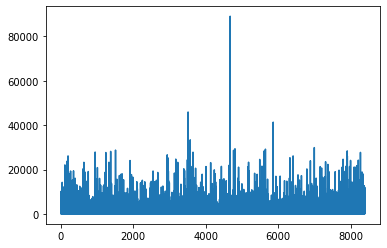

In [257]:
#we can't find values if we click any of the point in matplotlib but in plotly we can find
plt.plot(data.Sales)

In [258]:
#plotting single column
plo.plot([{
    'x' : data.index,
    'y' : data.Sales
}])

'temp-plot.html'

In [210]:
#plotting multi columns
data_sub=data[['Sales','Profit']]
data_sub.head()

,Sales,Profit
0,261.5400,-213.2500
1,10123.0200,457.8100
2,244.5700,46.7075
3,4965.7595,1198.9710
4,394.2700,30.9400


In [211]:
#used list comprehension to give value for cal in y axis
plo.plot([{
    'x' : data_sub.index,
    'y' : data_sub[col],
    'name' : col
}for col in data_sub.columns])

'temp-plot.html'

In [14]:
#library for charts(scatter,bar,line)
import plotly.graph_objs as go

In [15]:
#way_1
#brackets are imp
plo.plot([go.Scatter(
    x= data.Profit,
    y= data.Sales,
    mode='markers',
)])

'temp-plot.html'

In [16]:
#way_2
d=go.Scatter(
    x= data.Profit,
    y= data.Sales,
    mode='markers')

In [17]:
plo.plot([d])

'temp-plot.html'

In [212]:
#if we use 'marker' instead 'markers' scatter points all get connects and create line kinda points
d=[go.Scatter(
    x= data.Sales,
    y= data.Profit,
    mode='markers')]

In [213]:
#properties of scatter points
d=[go.Scatter(
    x= data.Sales,
    y= data.Profit,
    mode='markers',
    marker=dict(size=14,
               color='rgb(120,150,180)',
               symbol='square',
    line=dict(width=2)))]

In [214]:
#layout,title,xasix,yasix naming
#hovermode gives both (x,y) values if we click a point
layout=go.Layout(
title='Sales vs Profit',
xaxis=dict(title='Profit'),
yaxis=dict(title='Sales'),
hovermode='closest')

In [215]:
fig=go.Figure(data=d,layout=layout)

In [216]:
plo.plot(fig)

'temp-plot.html'

In [217]:
#bar chart
#making a table by mean of sales using pivot which means grouping categorical cvolumn and shoiwing there aggregate_function
a=pd.pivot_table(data,values='Sales',index='Order Priority')
a

,Sales
Order Priority,
Critical,1694.526538
High,1848.052240
Low,1908.506033
Medium,1755.028890
Not Specified,1661.700536


In [24]:
#single bar chart
d=[go.Bar(x=a.index,
          y=a.Sales,
          name='Avg Sales',
         )]

In [101]:
#bar chart properties
d=[go.Bar(x=a.index,
          y=a.Sales,
          name='Avg Sales',
          marker=dict(color='rgb(120,180,240)'))]

In [218]:
#multiple bar chart
e=pd.pivot_table(data,values=['Sales','Profit'],index='Order Priority')
e

,Profit,Sales
Order Priority,,
Critical,113.729373,1694.526538
High,230.243022,1848.052240
Low,224.526069,1908.506033
Medium,200.522195,1755.028890
Not Specified,130.732613,1661.700536


In [219]:
d_1=go.Bar(
    x= e.index,
    y= e.Profit,
    name='Avg Profit')
d_2=go.Bar(
    x= e.index,
    y= e.Sales,
    name='Avg Sales')

In [220]:
d=[d_1,d_2]

In [ ]:
#it gives multiple values bar
layout=go.Layout(title='Order Priority vs Profit,Sales')

In [221]:
#it gives multiple values in single bar coz we used barmode
layout=go.Layout(title='Order Priority vs Profit,Sales',barmode='stack')

In [222]:
fig=go.Figure(data=d,layout=layout)

In [223]:
plo.plot(fig)

'temp-plot.html'

In [27]:
#line chart
d=[go.Scatter(
    x= data['Order Date'],
    y= data['Sales'],
    mode='lines',
    name='Avg Sales')]
layout=go.Layout(title='Order Priority vs Sales')

In [28]:
fig=go.Figure(data=d,layout=layout)

In [29]:
#we saved filename as linechart 
plo.plot(fig,filename='line_chart.html')

'line_chart.html'

In [30]:
#multi line chart
#making a table by default mean of sales and profit using pivot by index
b=pd.pivot_table(data,values=['Sales','Profit'],index='Order Priority')
b

,Profit,Sales
Order Priority,,
Critical,113.729373,1694.526538
High,230.243022,1848.052240
Low,224.526069,1908.506033
Medium,200.522195,1755.028890
Not Specified,130.732613,1661.700536


In [43]:
#line without points coz mode is lines only
d_1=go.Scatter(
    x= b.index,
    y= b.Profit,
    mode='lines',
    name='Avg Profit')
d_2=go.Scatter(
    x= b.index,
    y= b.Sales,
    mode='lines',
    name='Avg Sales')

In [50]:
#line with points coz mode is markers+lines
d_1=go.Scatter(
    x= b.index,
    y= b.Profit,
    mode='markers+lines',
    name='Avg Profit')
d_2=go.Scatter(
    x= b.index,
    y= b.Sales,
    mode='lines',
    name='Avg Sales')

In [51]:
d=[d_1,d_2]

In [64]:
#for making line plot using pivot by column
c=pd.pivot_table(data,values=['Sales','Profit'],columns='Order Priority')
c

Order Priority,Critical,High,Low,Medium,Not Specified
Profit,113.729373,230.243022,224.526069,200.522195,130.732613
Sales,1694.526538,1848.052240,1908.506033,1755.028890,1661.700536


In [224]:
#making automatically line plot using list comprehension
d=[go.Scatter(
    x= c.columns,
    y= c.loc[row],
    mode='markers+lines',
    name='row'
    )for row in c.index]

In [225]:
layout=go.Layout(title='Order Priority vs Sales ,Profit')

In [226]:
fig=go.Figure(data=d,layout=layout)

In [227]:
plo.plot(fig)

'temp-plot.html'

In [228]:
#combo chart plotting two plot in single graph
#bar chart
d_1=go.Bar(
    x= e.index,
    y= e.Sales,
    name='Avg Sales')
#line chart with points
d_2=go.Scatter(
    x= e.index,
    y= e.Profit,
    mode='markers+lines',
    name='Avg Profit in lines')

In [229]:
d=[d_1,d_2]

In [230]:
layout=go.Layout(title='Order Priority vs Sales ,Profit')

In [231]:
fig=go.Figure(data=d,layout=layout)

In [232]:
plo.plot(fig)

'temp-plot.html'

In [112]:
#bubble chart 
#same as scatter but size of point is changing
d=[go.Scatter(
    x= data.Sales,
    y= data.Profit,
    text=data['Customer Name'],
    mode='markers',
    marker=dict(size=100*data.Discount)
)]

In [233]:
#creating bubble chart with three different Order Priority 
d_1=go.Scatter(
    x= data.Sales[data['Order Priority']=='High'],
    y= data.Profit[data['Order Priority']=='High'],
    name='High',
    text=data['Customer Name'],
    mode='markers',
    marker=dict(size=100*data.Discount[data['Order Priority']=='High'])
)
d_2=go.Scatter(
    x= data.Sales[data['Order Priority']=='Medium'],
    y= data.Profit[data['Order Priority']=='Medium'],
    name='Medium',
    text=data['Customer Name'],
    mode='markers',
    marker=dict(size=100*data.Discount[data['Order Priority']=='Medium'])
)
d_3=go.Scatter(
    x= data.Sales[data['Order Priority']=='Low'],
    y= data.Profit[data['Order Priority']=='Low'],
    name='Low',
    text=data['Customer Name'],
    mode='markers',
    marker=dict(size=100*data.Discount[data['Order Priority']=='Low'])
)

In [234]:
d=[d_1,d_2,d_3]

In [235]:
layout=go.Layout(title='Sales vs Profit',
                 xaxis=dict(title='Profit'),
                 yaxis=dict(title='Sales'),
                 hovermode='closest')

In [236]:
fig=go.Figure(data=d,layout=layout)

In [237]:
plo.plot(fig)

'temp-plot.html'

In [238]:
#histogram 
d_1=go.Histogram(
    x= data.Sales,
    name='Sales',
    opacity=0.5
)
d_2=go.Histogram(
    x= data.Profit,
    name='Profit',
    opacity=0.5
)

In [239]:
d=[d_1,d_2]

In [240]:
d=[d_1,d_2]

In [241]:
fig=go.Figure(data=d,layout=layout)

In [242]:
plo.plot(fig)

'temp-plot.html'

In [244]:
#box plot
data['Customer Segment'].value_counts()

Corporate         3076
Home Office       2032
Consumer          1649
Small Business    1642
Name: Customer Segment, dtype: int64

In [245]:
cor=data.Sales[data['Customer Segment']=='Corprate']
ho=data.Sales[data['Customer Segment']=='Home Office']
con=data.Sales[data['Customer Segment']=='Consumer']
sb=data.Sales[data['Customer Segment']=='Small Business']

In [246]:
d_1=go.Box(y=cor,
          name='Corprate')
d_2=go.Box(y=ho,
          name='Home Office')
d_3=go.Box(y=con,
          name='Consumer')
d_4=go.Box(y=sb,
          name='Small Business')

In [247]:
d=[d_1,d_2,d_3,d_4]

In [248]:
layout=go.Layout(title='Distribution of Customer Segment')

In [249]:
fig=go.Figure(data=d,layout=layout)

In [250]:
plo.plot(fig)

'temp-plot.html'

In [251]:
#scatterplot matrix
import plotly.figure_factory as plff

In [252]:
x=data.loc[:,['Sales','Profit','Discount','Order Priority']]
x['index']=np.arange(1,len(x)+1)
x

,Sales,Profit,Discount,Order Priority,index
0,261.5400,-213.2500,0.04,Low,1
1,10123.0200,457.8100,0.07,High,2
2,244.5700,46.7075,0.01,High,3
3,4965.7595,1198.9710,0.08,High,4
4,394.2700,30.9400,0.08,Not Specified,5
...,...,...,...,...,...
8394,1294.0400,-323.1800,0.05,Medium,8395
8395,392.5700,22.2500,0.04,Medium,8396
8396,823.7800,343.0500,0.03,Not Specified,8397
8397,469.8375,-159.2360,0.00,Not Specified,8398


In [202]:
#here we choose all the data
fig=plff.create_scatterplotmatrix(x,diag='box',index='index',colormap='Portland',colormap_type='cat')

In [253]:
#here we are taking all data by grouping of 'Order Priority'
fig=plff.create_scatterplotmatrix(x,diag='box',index='Order Priority',colormap='Portland',colormap_type='cat')